<a href="https://colab.research.google.com/github/RubiAnahiPerezFlores/TPFinalSAT/blob/main/TPFinalSAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Explorando datos con Python**

**EDA: Abandono de Clientes Banco Financiero**



**1. Instalar paquetes.**

Hacer uso de las distintas librerias que estan a nuestra disposición.

In [31]:
import pandas as pd
import numpy as np
import lightgbm as lgbm
import sklearn as sk
import xgboost as xgb
from sklearn import model_selection
from sklearn import ensemble
from sklearn import preprocessing as sk_prep
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt



**2. Carga de datos.**

Se realiza la carga del csv, obtenida de la internet en un formato excel.


In [44]:
url= "/content/sample_data/Churn_Modelling.csv" #Todo lo que es un objeto

In [48]:
df_base = pd.read_csv(url).drop(columns=['RowNumber', 'Surname', 'CustomerId'], axis = 1)

df_base.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


**2.1 Visualización de datos**

Además de una previsualización de los datos, es importante saber la forma de los mismos: cuántas filas y columnas tenemos disponibles.

In [49]:
print(df_base.shape)

(10000, 11)


In [18]:
label = 'Exited'
df_columns = list(df_base.columns)
df_columns.remove(label)
print(df_columns)

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [84]:
df_base['Geography']

0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object

In [86]:
df_base['Geography'].unique() #toma sin repetir. Cada país que aparecen como objeto.

array(['France', 'Spain', 'Germany'], dtype=object)

In [87]:
df_base['Geography'].drop_duplicates()

0     France
1      Spain
7    Germany
Name: Geography, dtype: object

In [88]:
df_base['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [89]:
df_base['Geography'].describe()

count      10000
unique         3
top       France
freq        5014
Name: Geography, dtype: object

In [90]:
df_base.groupby('Geography').mean()

<ipython-input-90-98fca2eee4a4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_base.groupby('Geography').mean()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


**3. Limpieza de datos**

3.1 Descriptivos



In [64]:
print(df_base.shape)
print(df_base.head().transpose())

(10000, 11)
                         0          1          2         3          4
CreditScore            619        608        502       699        850
Geography           France      Spain     France    France      Spain
Gender              Female     Female     Female    Female     Female
Age                     42         41         42        39         43
Tenure                   2          1          8         1          2
Balance                0.0   83807.86   159660.8       0.0  125510.82
NumOfProducts            1          1          3         2          1
HasCrCard                1          0          1         0          1
IsActiveMember           1          1          0         0          1
EstimatedSalary  101348.88  112542.58  113931.57  93826.63    79084.1
Exited                   1          0          1         0          0


3.2 Nulos y duplicados

In [91]:
df_base.info() #me da los nulls y los tipos de datos. Observar el tipo de dato y se puede ir limpiando por si es categorico por ejemplo.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [69]:
df_base.isna().sum() #Para hallar missings. Cuando Falta el valor.

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

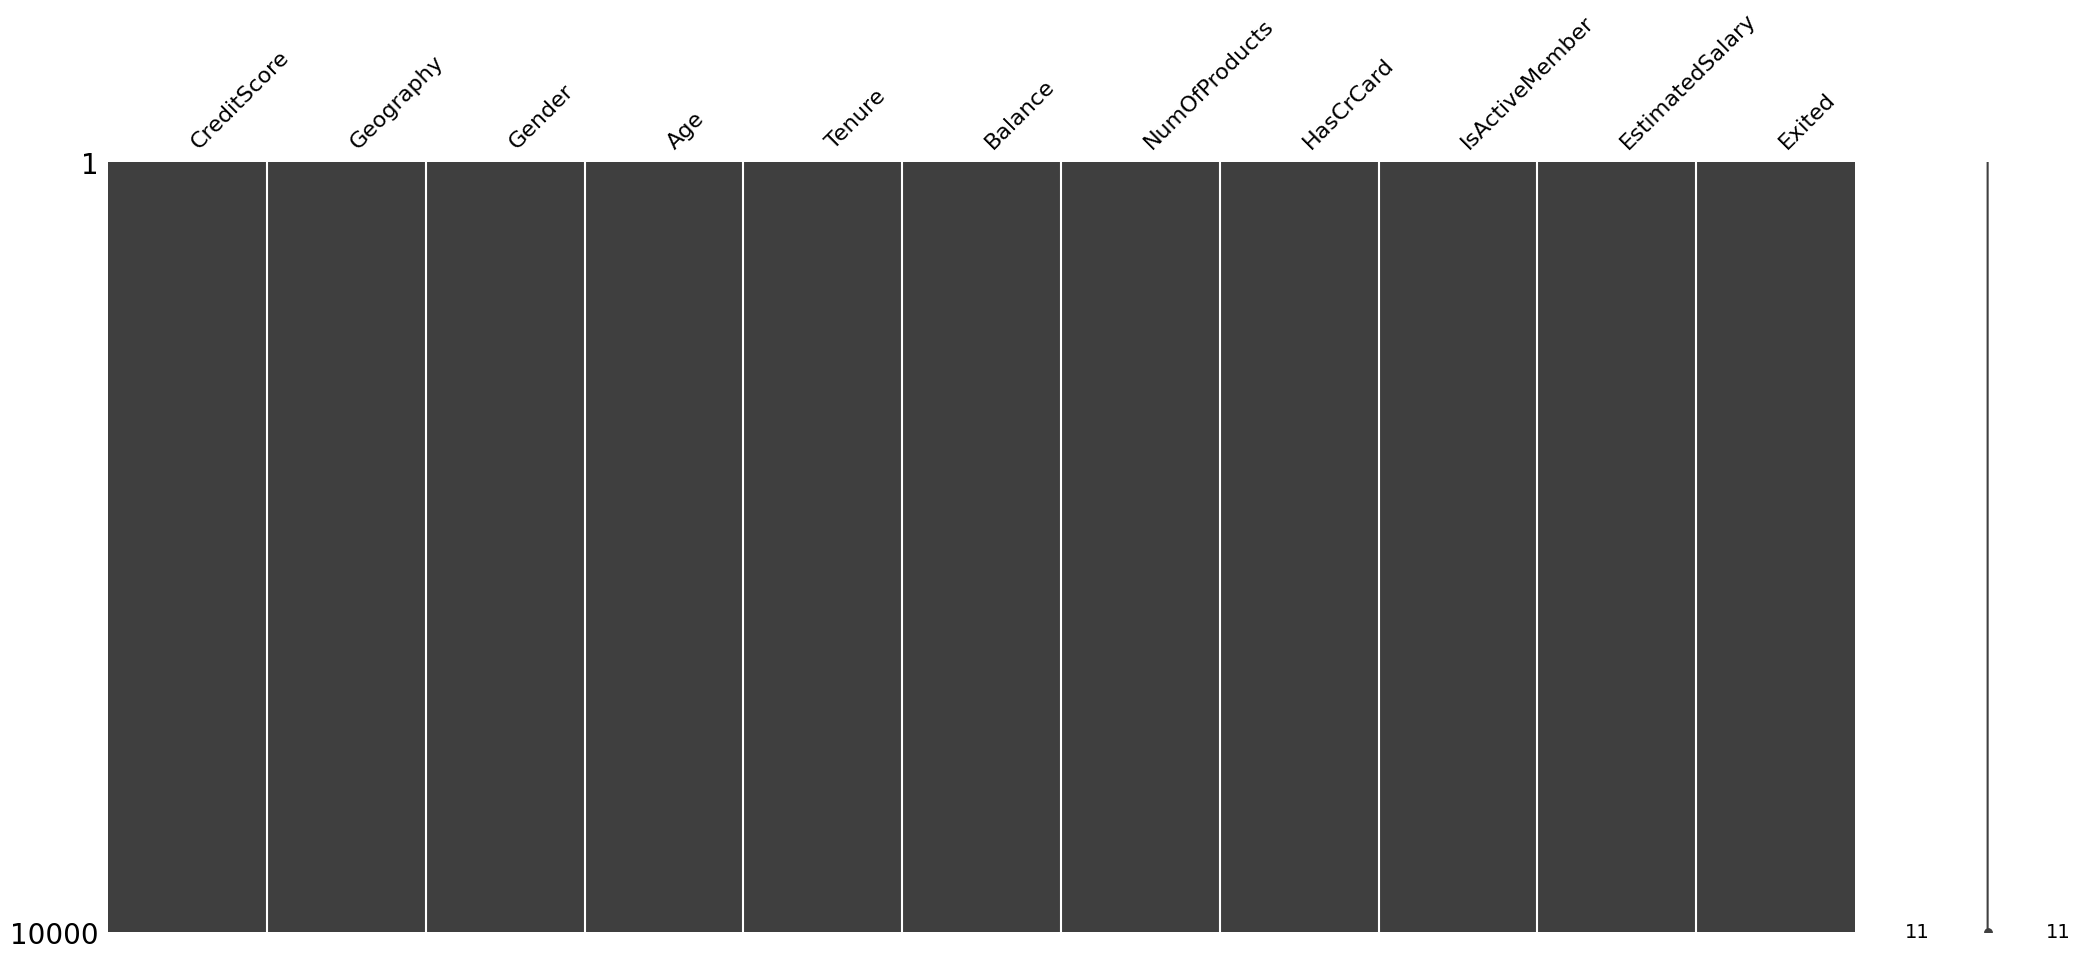

In [72]:
import missingno
missingno.matrix(df_base)
plt.show()

3.3 Conversión de datos

In [66]:
df_base.info() #LA DATA CONCUERDA CON EL TIPO DE DATO QUE SE QUIERE MOSTRAR.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


**4. Análisis**

In [67]:
df_base.describe(include ="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
HasCrCard,10000.0,NaN,NaN,NaN,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0
IsActiveMember,10000.0,NaN,NaN,NaN,0.5151,0.499797,0.0,0.0,1.0,1.0,1.0
EstimatedSalary,10000.0,NaN,NaN,NaN,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


In [68]:
df_base.describe().transpose() #deja las numericas. TRAE VARIABLES NUMERICAS. SE PUEDE MEDIDAS ESTADÍSTICAS.

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


4.1 Análisis segmentación por edad

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


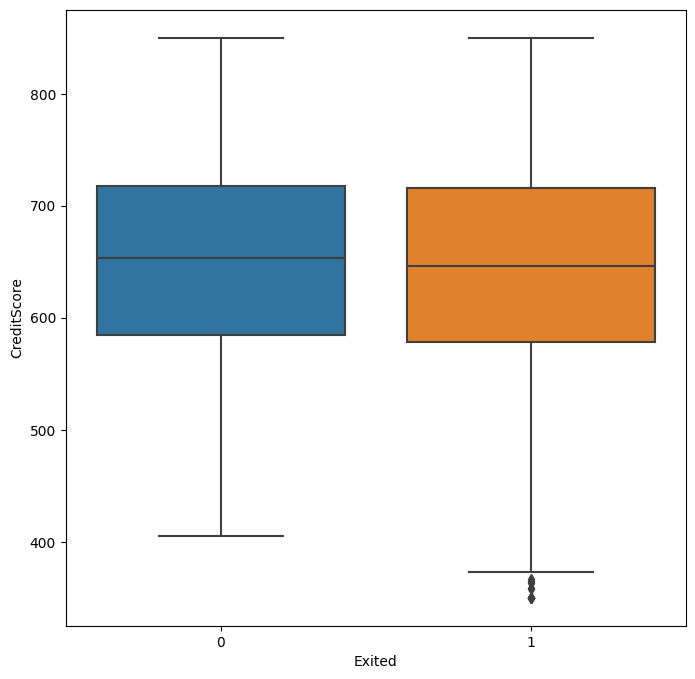

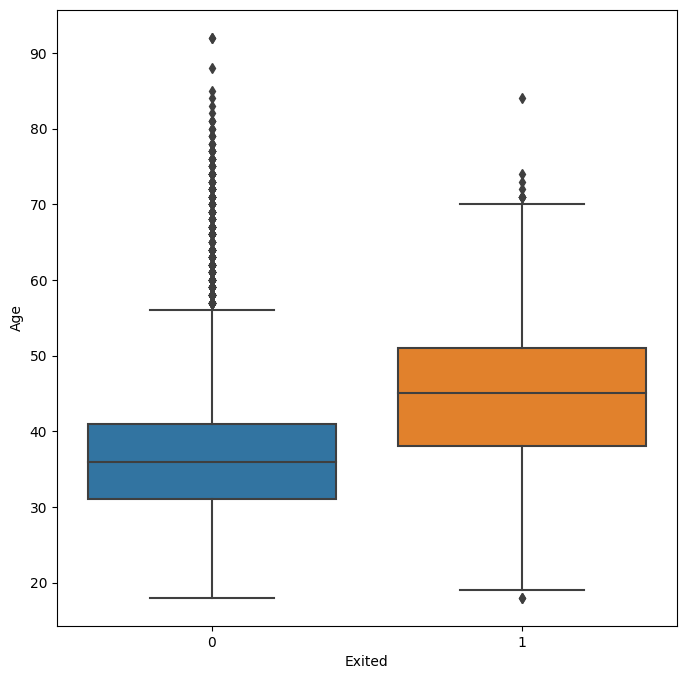

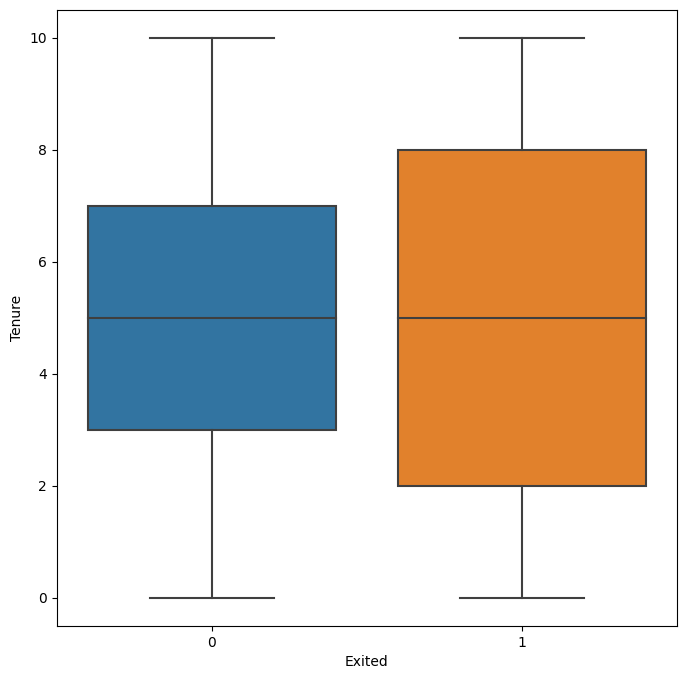

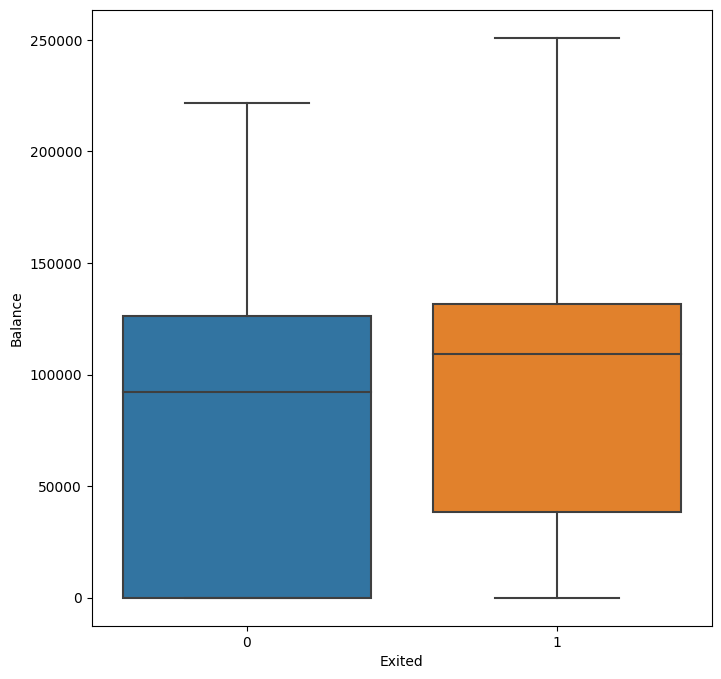

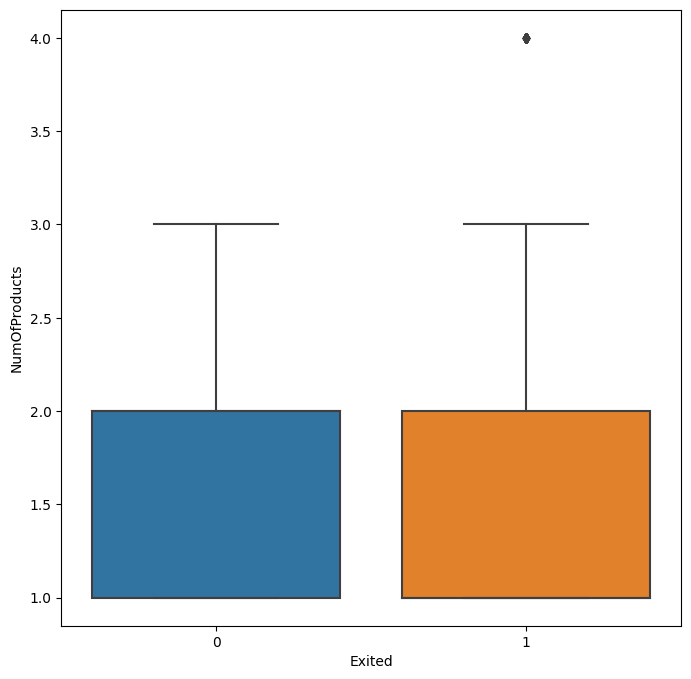

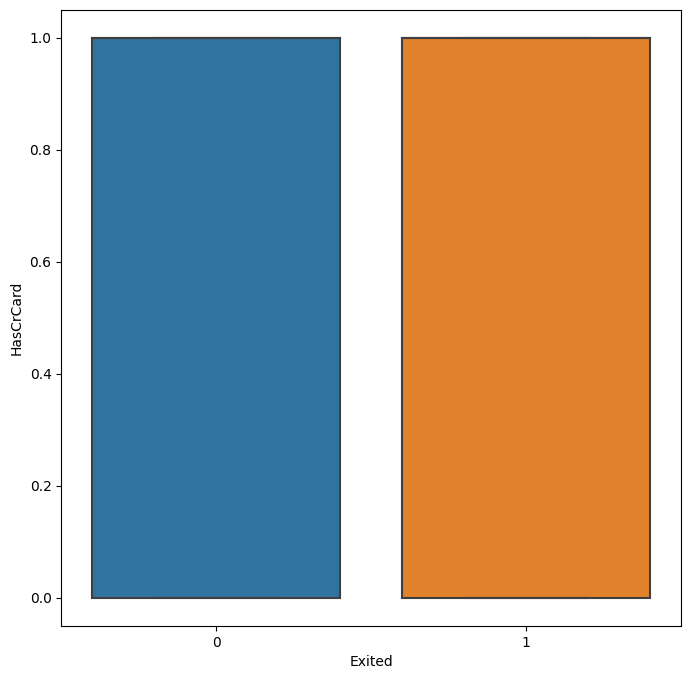

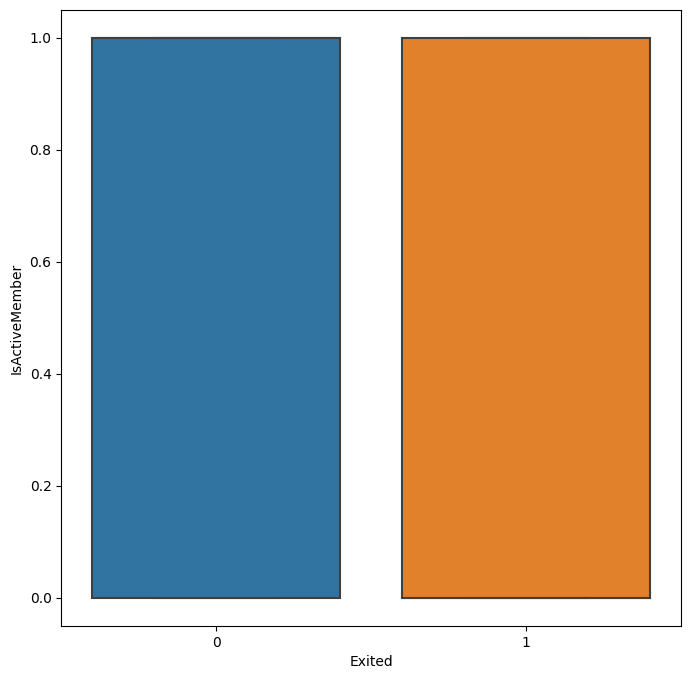

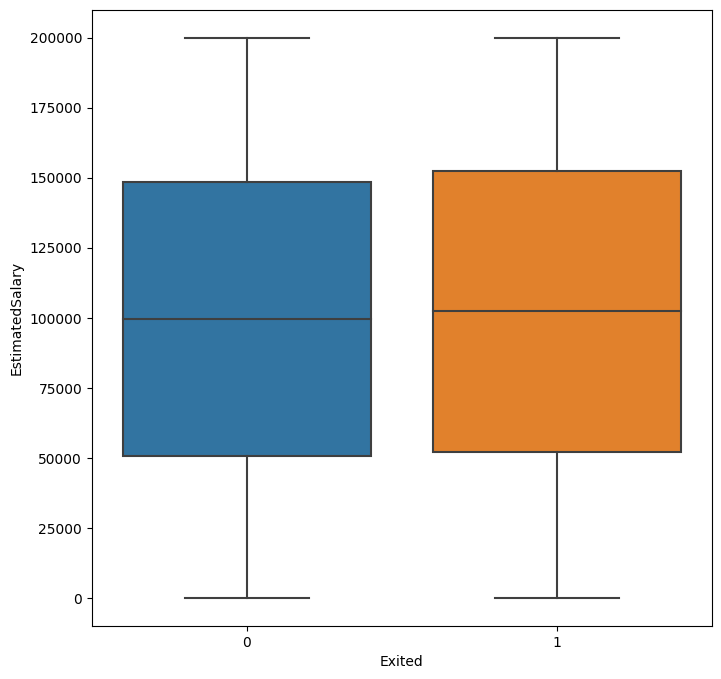

In [107]:
num_cols=list(df_base._get_numeric_data().columns)
num_cols.remove(label)

cat_cols =list(set(df_base.columns)-set(num_cols))
print (num_cols)

for c in num_cols:
  plt.figure(figsize=(8,8))
  ax=sns.boxplot(x=label, y=c,data=df_base)

4.2 Análisis para variables no categóricas

['Gender', 'Exited', 'Geography']


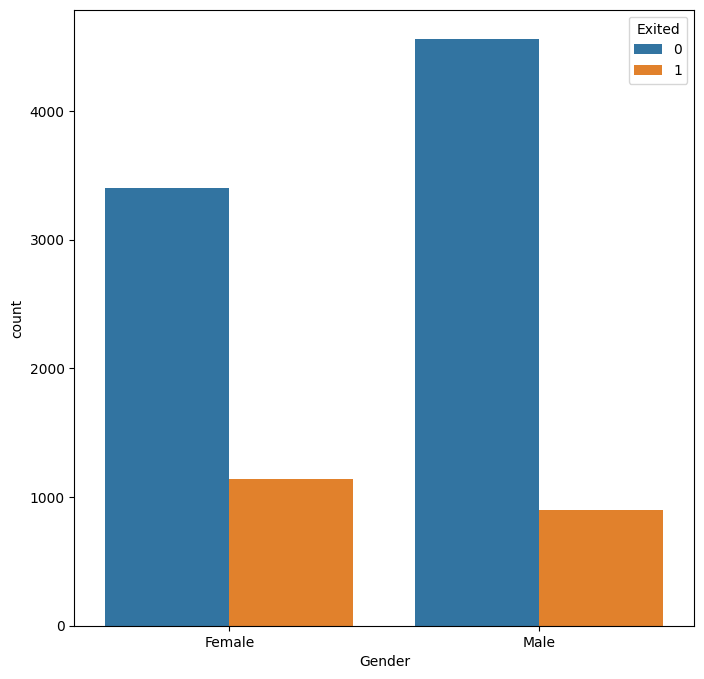

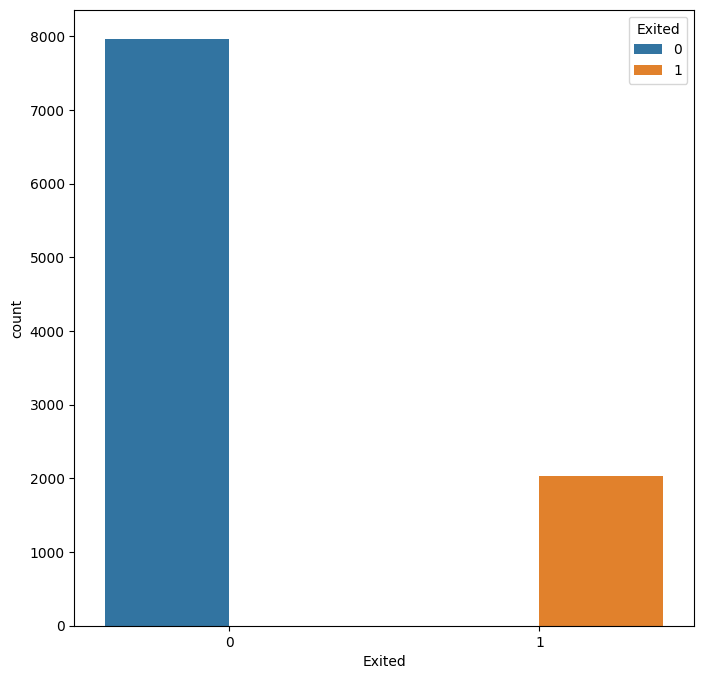

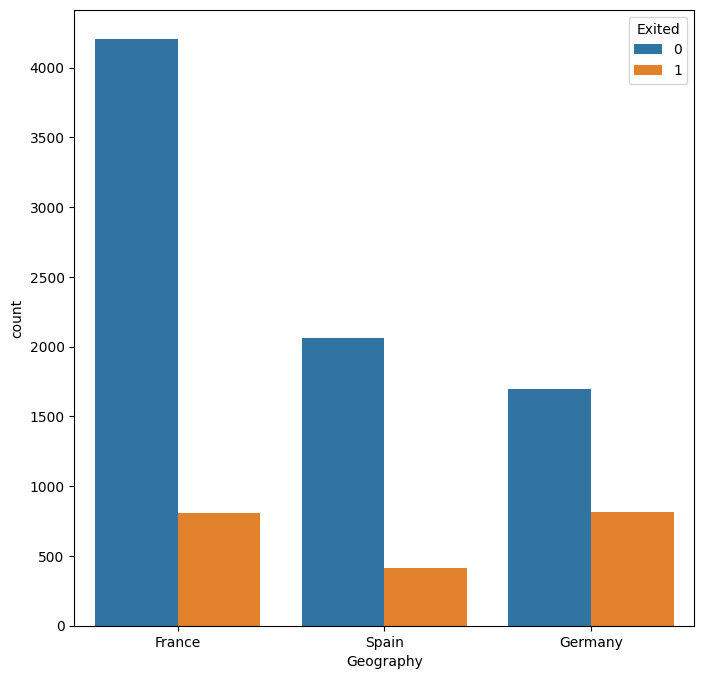

In [108]:
print(cat_cols)
for c in cat_cols:
  plt.figure(figsize=(8,8))
  ax =sns.countplot(x=c, hue=label, data=df_base)

4.3 Análisis con una codificación de texto a números

In [115]:

#how much data do we have?
print(df_base.shape)


(10000, 11)


In [124]:
label = 'Exited'
df_columns = list(df_base.columns)
df_columns.remove(label)
print(df_columns)

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [3]:

l_binarizer = sk_prep.LabelBinarizer()
str_encoder = sk_prep.OrdinalEncoder()
y_encoded = l_binarizer.fit_transform(y=df_base[label])

X_encoded = pd.DataFrame(str_encoder.fit_transform(X=df_base.drop(columns = [label], axis = 1)),
                            columns = df_columns)

X_encoded.head(10)

NameError: ignored

<Axes: >

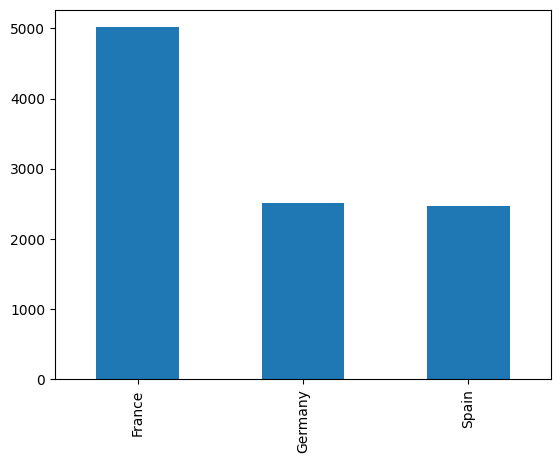

In [28]:
caso['Geography'].value_counts().plot.bar() #permite hacer una comparacion.

<Axes: >

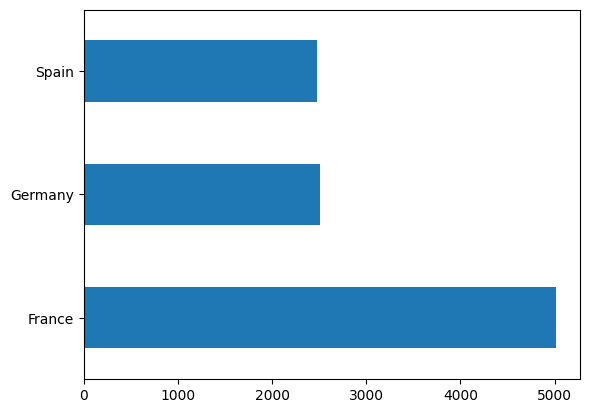

In [92]:
df_base['Geography'].value_counts().plot.barh()

<Axes: xlabel='Balance', ylabel='Geography'>

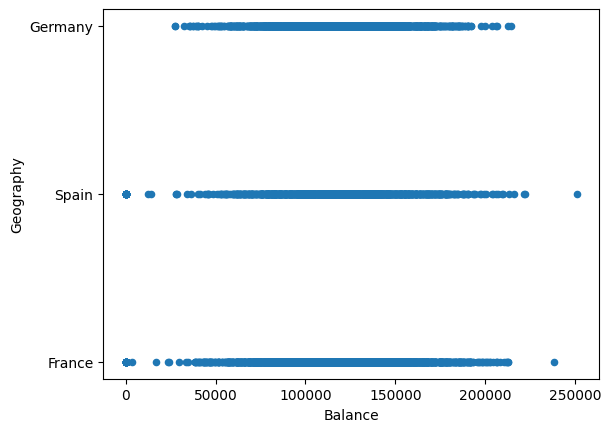

In [31]:
caso.plot.scatter(x='Balance',y='Geography')

<Axes: ylabel='IsActiveMember'>

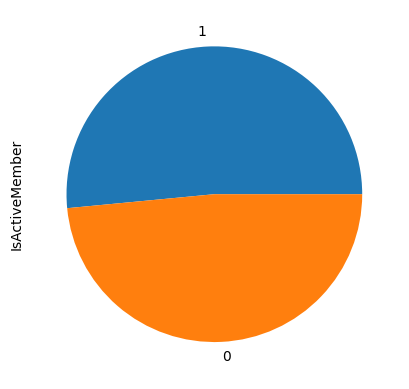

In [32]:
caso['IsActiveMember'].value_counts().plot.pie()

<Axes: ylabel='Frequency'>

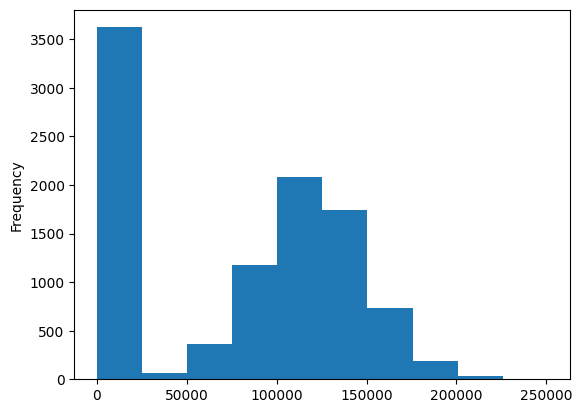

In [27]:
caso['Balance'].plot.hist() #veo la distribucion de datos de una columna numerica.